In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [167]:
folder_path = "data/e production=ep sanyo ep sanyo 020"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064" and "TBA_CU"
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_CU" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 24836, Columns: 18
DataFrame 2 - Rows: 24802, Columns: 18
DataFrame 3 - Rows: 24883, Columns: 18
DataFrame 4 - Rows: 24988, Columns: 18
DataFrame 5 - Rows: 25019, Columns: 18
DataFrame 6 - Rows: 26315, Columns: 18
DataFrame 7 - Rows: 25682, Columns: 18
DataFrame 8 - Rows: 26458, Columns: 18
DataFrame 9 - Rows: 27153, Columns: 18
DataFrame 10 - Rows: 30940, Columns: 18
DataFrame 11 - Rows: 30182, Columns: 18
DataFrame 12 - Rows: 39169, Columns: 18
DataFrame 13 - Rows: 37772, Columns: 18
DataFrame 14 - Rows: 28131, Columns: 18
DataFrame 15 - Rows: 39785, Columns: 18
DataFrame 16 - Rows: 42746, Columns: 18
16


test that data is loaded succesfully

In [ ]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

### Crop The Values

In [168]:
filtered_dataframes = []

for df in dataframes:
    schritt_mask = ((df['Schritt'] == 4) | (df['Schritt'] == 5)) & (df['Zeit'] >= 10)
    start_index = df[schritt_mask]
    start_time = start_index.iloc[0]['Zeit']
    end_time = start_time + 4
    print(start_index.iloc[0]['Zeit'])

    time_mask = (df['Zeit'] >= start_time) & (df['Zeit'] <= end_time) & ((df['Schritt'] == 4) | (df['Schritt'] == 5))

    filtered_df = df[time_mask]
    filtered_dataframes.append(filtered_df)

16.349169444441795
16.652119444410005
16.537177777753936
16.471375000013246
16.66
16.714702777796322
16.75353611111641
17.987641666664018
19.6056611111429
18.167472222248712
18.160644444492128
16.704069444470935
16.92146944443385
15.857902777724796
15.97703333331479
15.78041111111641


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

In [ ]:
columns_to_plot = [15,9] 
I = 0
for i in dataframes:
    print("Graph No. :",I)
    print(dfarrnames[I])
    start_time = filtered_dataframes[I].iloc[0]['Zeit']
    plot_threshold(columns_to_plot, filtered_dataframes[I],start_time,start_time+3.5)
    I=I+1

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [169]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in filtered_dataframes:
    max_values = max_threshold(columns_to_plot, df, 0, 35)
    min_values = min_threshold(columns_to_plot, df, 0, 35)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.408128837643744], [2.411389316523128], [2.414866784434707], [2.402562406587094], [2.398996044834348], [2.393508292745537], [2.397222291005164], [2.406520296175586], [2.466319378891058], [2.359609430168348], [2.351226855374989], [2.277435730989964], [2.268624476775585], [2.212760424332373], [2.206894567472773], [2.204293146885902]]
[[0.6621610974052601], [0.6899856248292053], [0.723348627161613], [0.7453500507208446], [0.7721608496713088], [0.8197748756028886], [0.900561649114934], [1.051454744794683], [1.283912296588824], [1.336538592364377], [1.39426812991951], [1.504077377172507], [1.605702410728554], [1.620976271593463], [1.6694440457577], [1.749693074989409]]
[1.7459677402384841, 1.7214036916939226, 1.691518157273094, 1.6572123558662493, 1.6268351951630393, 1.5737334171426482, 1.4966606418902302, 1.355065551380903, 1.182407082302234, 1.0230708378039708, 0.956958725455479, 0.7733583538174573, 0.6629220660470312, 0.59178415273891, 0.5374505217150729, 0.4546000718964929]
range(0, 

### Extract Requried data
`skip_indeces` are thoese which is creating problem in graph

In [172]:
skip_indices = []

extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.7459677402384841, 1.7214036916939226, 1.691518157273094, 1.6572123558662493, 1.6268351951630393, 1.5737334171426482, 1.4966606418902302, 1.355065551380903, 1.182407082302234, 1.0230708378039708, 0.956958725455479, 0.7733583538174573, 0.6629220660470312, 0.59178415273891, 0.5374505217150729, 0.4546000718964929]
range(0, 16)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

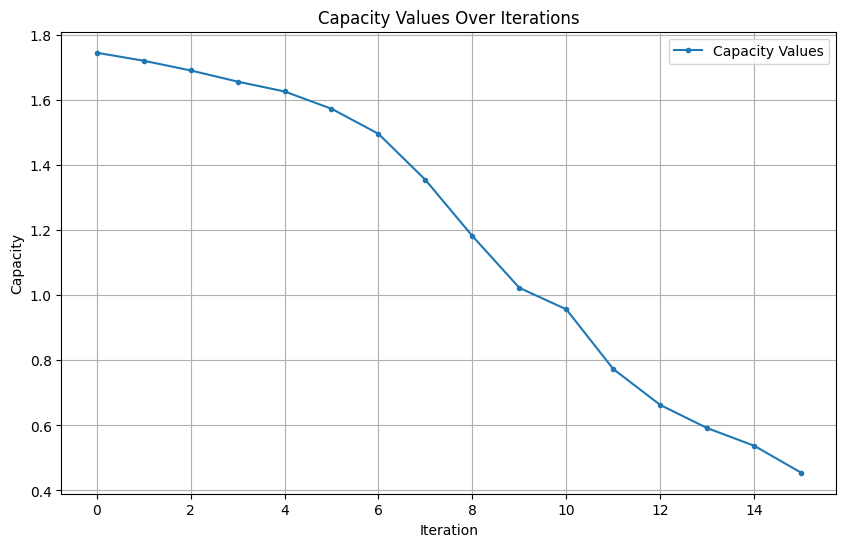

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [ ]:
csv_filename = "extracted_capacity_values_2.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

In [ ]:
csv_file = 'extracted_capacity_values_2.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

Skipping index:  5
Skipping index:  6


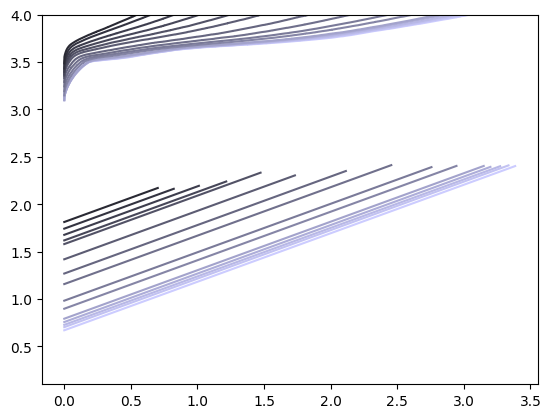

In [61]:
columns_to_plot = [15,9] 

plt1 = plt
plt2 = plt
i=0

for i,dataframe in enumerate(filtered_dataframes):
    if i not in skip_indices:
        start_time = filtered_dataframes[i].iloc[0]['Zeit']
        plot_threshold_same_plot(columns_to_plot, filtered_dataframes[i], start_time, start_time+4, plt1, y_min=0.1, y_max=4,i=i)
    else:
        print("Skipping index: ",i)
i=i+1

plt1.show()

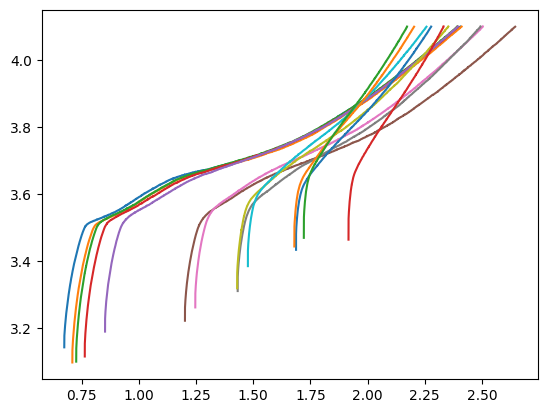

In [130]:
columns_to_plot = [9] 

plt1 = plt

for i,dataframe in enumerate(filtered_dataframes):
    
    #df = dataframe.to_numpy()
    #print(df.size)
    if i not in skip_indices:
        plt1.plot(dataframe.iloc[:, 9], dataframe.iloc[:, 15], label=f"Column")
    #plt1.scatter(dataframe[i],dataframe[i])


plt1.show()

### Croping Data

In [ ]:
import os
import csv

output_directory = "extracted_data"
os.makedirs(output_directory, exist_ok=True)

In [174]:
min_time = 3.1
max_time = 3.9
time_interval = 0.1

# List of column names to extract
columns_to_extract = ['Spannung','AhAkku']

for current_time in np.arange(min_time, max_time + time_interval, time_interval):
    csv_filename = os.path.join(output_directory, f"extracted_data_{current_time:.1f}.csv")

    I = 0
    for index, dataframe in enumerate(filtered_dataframes):
        if index in skip_indices:
            #print(f"Skipping index: {index}")
            continue

        data = {}
        for column in columns_to_extract:
            column_data = dataframe[column]
            column_mask = (dataframe['Spannung'] >= current_time) & (dataframe['Spannung'] <= current_time + time_interval)
            column_data = column_data[column_mask].to_numpy()

            if not column_data.size:
                continue

            column_range = np.linspace(column_data.min(), column_data.max(), num=50)
            data.update({f'{column}_{i + 1}': value for i, value in enumerate(column_range)})

        data['Max_Capacity'] = max_values_list[I][0]
        data['Capacity'] = capacity_values_list[I]

        with open(csv_filename, 'a', newline='') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=data.keys())
            #if index == 0:
                #writer.writeheader()
            writer.writerow(data)

        I += 1

    print(f"Saved CSV file: {csv_filename}")


Saved CSV file: extracted_data\extracted_data_3.1.csv
Saved CSV file: extracted_data\extracted_data_3.2.csv
Saved CSV file: extracted_data\extracted_data_3.3.csv
Saved CSV file: extracted_data\extracted_data_3.4.csv
Saved CSV file: extracted_data\extracted_data_3.5.csv
Saved CSV file: extracted_data\extracted_data_3.6.csv
Saved CSV file: extracted_data\extracted_data_3.7.csv
Saved CSV file: extracted_data\extracted_data_3.8.csv
Saved CSV file: extracted_data\extracted_data_3.9.csv
